In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [6]:
iris = load_iris()

X = iris.data
y = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)


# check classification accuracy of KNN with 
K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


0.9736842105263158


In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X,y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [6]:
print(scores.mean())

0.9666666666666668


In [20]:
k_range = list(range(1,31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Testing Accuracy')

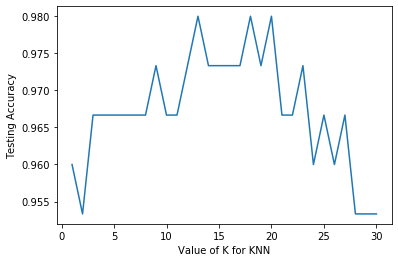

In [21]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [28]:
print( "The best accuracy was with", max(k_scores), "with k=", k_scores.index(max(k_scores)) ) 

The best accuracy was with 0.9800000000000001 with k= 12


In [2]:
from sklearn.metrics import jaccard_score

In [13]:
score = jaccard_score(y_test,y_pred,average=None)

In [15]:
score.mean()

0.9326923076923078

In [23]:
k_range = list(range(1,31))
k_scores_jac = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    j_scores = jaccard_score(y_test,y_pred,average=None)
    k_scores_jac.append(j_scores.mean())
print(k_scores_jac)

[0.8746438746438746, 0.8746438746438746, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.8746438746438746, 0.9326923076923078, 0.8746438746438746, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.9326923076923078, 0.8746438746438746, 0.8746438746438746, 0.8746438746438746]


In [29]:
print( "The best accuracy was with", max(k_scores_jac), "with k=", k_scores_jac.index(max(k_scores_jac)) ) 

The best accuracy was with 0.9326923076923078 with k= 2


Text(0, 0.5, 'Testing Accuracy')

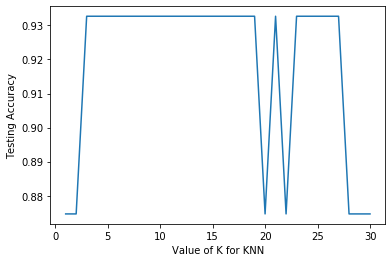

In [24]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, k_scores_jac)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### The difference in using jaccard index and cross_val in seen clearly--
####    according to cross_val the best acccuracy is 98% at k=12  but using jaccard index best accuracy is 93% at k=2

In [32]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
knn_score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.9800000000000001


In [35]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
lr_score = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.9533333333333334


In [48]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
regressor.predict(X_test)
svr_score = cross_val_score(regressor,X,y, cv=10,)
svr_score

array([0.        , 0.        , 0.        , 0.92277595, 0.        ,
       0.        , 0.95857438, 0.        , 0.        , 0.        ])